To avoid overfitting:   
(1) Collect more data   
(2) Regularization  
(3) Choose a simpler model   
(4) Reduce the dimensionality of the data

In this part, regularization is used.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For data splitting
from sklearn.model_selection import train_test_split
# For min-max rescaling
from sklearn.preprocessing import MinMaxScaler
# For standardization
from sklearn.preprocessing import StandardScaler
# Logistic regression
from sklearn.linear_model import LogisticRegression

In [2]:
# Read the online wine data set with no headers
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

# Assign column labels
# The feature names can be found online.
df_wine.columns = ['Class label', 
              'Alcohol', 
              'Malic acid', 
              'Ash', 
              'Alcalinity of ash', 
              'Magnesium', 
              'Total phenols', 
              'Flavanoids', 
              'Nonflavanoid phenols', 
              'Proanthocyanins', 
              'Color intensity', 
              'Hue', 
              'OD280/OD315 of diluted wines', 
              'Proline']

In [3]:
# Split the data set into a training set and a test set
y = df_wine.iloc[:, 0].values
X = df_wine.iloc[:, 1:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
# test_size=0.3: the testing set contains 30% data
# stratify=y: both the train and testing sets have the same class proportions as the original dataset.

In [4]:
# Standardization
# Create a scaler
stdsc = StandardScaler()
# Fit and transform the training set
X_train_std = stdsc.fit_transform(X_train)
# Transform the testing set with the same scaler
X_test_std = stdsc.transform(X_test)

In [5]:
# Logistic regression with L1 regularization
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)

LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear')

In [6]:
print('Training accuracy', lr.score(X_train_std, y_train))
print('Test accuracy', lr.score(X_train_std, y_train))
# accuracy = correct_predictions / total_predictions

Training accuracy 1.0
Test accuracy 1.0


In [7]:
lr.intercept_
# There are three intersepts since we use OvR for multiclassification

array([-1.26353658, -1.21570991, -2.36996272])

In [8]:
lr.coef_
# There are 3*13 weights
# Note that there are several zero weights. This reflects the sparsity in L1 regularization.
# Therefore, L1 regularization can serve as a feature selection tool. Irrelevant features have zero weights.

array([[ 1.24578824,  0.18060955,  0.74494321, -1.16264071,  0.        ,
         0.        ,  1.16472711,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55233079,  2.50978093],
       [-1.53708362, -0.38736641, -0.99550942,  0.36534835, -0.05942748,
         0.        ,  0.66810893,  0.        ,  0.        , -1.93427915,
         1.23314531,  0.        , -2.23144708],
       [ 0.13556682,  0.16857126,  0.3572885 ,  0.        ,  0.        ,
         0.        , -2.43747663,  0.        ,  0.        ,  1.56363923,
        -0.81908034, -0.49235333,  0.        ]])

In [9]:
# We can reduce C to get more sparsity.
# However, the accuracy is not as good as C=1.0.
lr2 = lr = LogisticRegression(penalty='l1', C=0.5, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy', lr.score(X_train_std, y_train))
print('Test accuracy', lr.score(X_train_std, y_train))
lr.coef_

Training accuracy 0.9919354838709677
Test accuracy 0.9919354838709677


array([[ 0.90425123,  0.        ,  0.32587852, -0.64415731,  0.        ,
         0.        ,  1.1437363 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.12654087,  2.17472128],
       [-1.29955252, -0.26165372, -0.62333267,  0.12549644,  0.        ,
         0.        ,  0.41907984,  0.        ,  0.        , -1.39982897,
         0.85864478,  0.072932  , -1.67706269],
       [ 0.        ,  0.21177825,  0.10594341,  0.        ,  0.        ,
         0.        , -1.915283  ,  0.        ,  0.        ,  1.29246463,
        -0.54659612, -0.44346343,  0.        ]])

In [12]:
# Vary regularization strength
weights = []
params = []
# Train with different regularization strength C
# Note that c and C are forced to be real. If integers are used, there will be error messages.
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    # OvA is used for multiclassification, so there are three sets of weights
    # We only use the second set.
    weights.append(lr.coef_[1]) 
    params.append(10**c)

# Convert the weights into a numpy array
weights = np.array(weights)



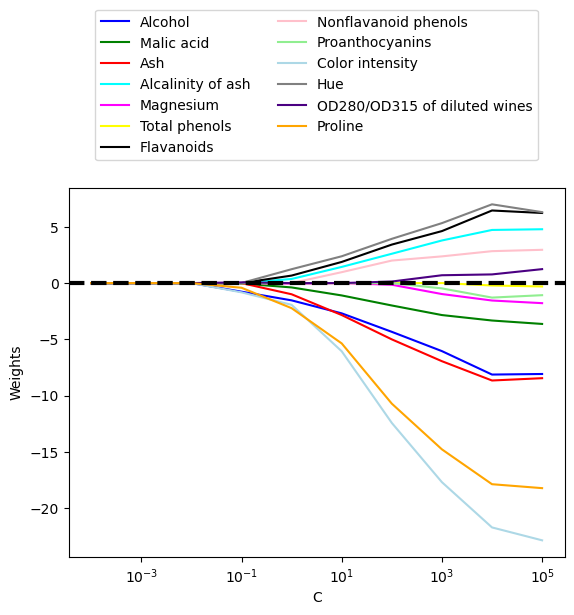

In [28]:
# Plot
colors = ['blue','green','red','cyan','magenta','yellow','black','pink','lightgreen', 'lightblue', 'gray', 'indigo', 'orange']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for column, color in zip(range(weights.shape[1]), colors):
    ax.plot(params, weights[:,column], label=df_wine.columns[column+1], color=color)

ax.axhline(0, color='black', linestyle="--", linewidth=3)

ax.set_xlabel('C')
ax.set_ylabel('Weights')
ax.set_xscale('log') # Log scale

#ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2, fancybox=True)